![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [418]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv


In [419]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [420]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [421]:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split    
    

In [448]:
def ML(df):
        # ###################  Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df.columns if df[s].dtypes == 'object']
    df.drop(object_columns, axis = 1, inplace=True)
    
    y = df['Rating'] # 
    X = df.drop(['Rating'], axis = 1)
    X = X.fillna(0)
    
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  random_state = RANDOM_SEED)
    
    # Создаём модель
    regr = RandomForestRegressor(n_estimators=100, verbose = 1, n_jobs = -1, random_state = RANDOM_SEED)
    
    # Обучаем модель на тестовом наборе данных
    regr.fit(X_train, y_train)
    
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = regr.predict(X_test)
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    
    # Выводим самые важные признаки для модели 
    plt.rcParams['figure.figsize'] = (5,5)
    feat_importances = pd.Series(regr.feature_importances_, index = X.columns)
    feat_importances.nlargest(15).plot(kind = 'barh')
    plt.show()


# DATA

In [449]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [450]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [451]:
# 10 столбцов, 40000 строк, 3 незаполненных столбца

In [452]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [453]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [454]:
# 9 столбцов, 10000 строк, 4 неполных столбца

In [455]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [456]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [457]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [458]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [460]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
13160,id_8610,Madrid,['Cafe'],8617.0,NaN,6.0,"[[], []]",/Restaurant_Review-g187514-d8093048-Reviews-Bl...,d8093048,1,2.0
14539,id_2317,London,"['Italian', 'Pizza', 'Vegetarian Friendly', 'V...",2322.0,$$ - $$$,414.0,"[[""Where's the meat??"", 'Office christmas lunc...",/Restaurant_Review-g186338-d730399-Reviews-Ziz...,d730399,1,3.5
31690,id_12592,Paris,NaN,12594.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187147-d10789547-Reviews-P...,d10789547,1,3.0
4596,id_4596,Barcelona,"['American', 'Fast Food', 'Halal']",941.0,$,135.0,"[['Decent', 'Great All beef burger, center of ...",/Restaurant_Review-g187497-d7171167-Reviews-Wi...,d7171167,0,0.0
48230,id_852,Lisbon,"['American', 'Bar', 'Fast Food', 'European', '...",853.0,$$ - $$$,169.0,"[['Good burgers high prices', 'new burger expe...",/Restaurant_Review-g189158-d7645677-Reviews-Bu...,d7645677,1,4.0


In [461]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [462]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [463]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [464]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

In [465]:
data['Number of Reviews']

0          4.0
1         97.0
2         28.0
3        202.0
4        162.0
         ...  
49995     79.0
49996    542.0
49997      4.0
49998     70.0
49999    260.0
Name: Number of Reviews, Length: 50000, dtype: float64

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [466]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [467]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [468]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [469]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
15371,id_1110,"['Italian', 'Pizza', 'Seafood', 'Mediterranean...",1111.0,$$ - $$$,867.0,"[['Fantastic staff, food and atmosphere!', 'So...",/Restaurant_Review-g187791-d2253455-Reviews-La...,d2253455,1,4.0,...,0,0,0,0,1,0,0,0,0,0
37583,id_84,"['European', 'Scandinavian', 'Vegetarian Frien...",85.0,$$ - $$$,237.0,"[['Super after a Sauna', 'Worth a visit'], ['0...",/Restaurant_Review-g189934-d10386627-Reviews-R...,d10386627,1,4.0,...,0,0,0,0,0,0,0,0,0,0
19950,id_1008,"['Polish', 'European']",1009.0,$$ - $$$,29.0,"[['Nice place for a break', 'Hippie fancy plac...",/Restaurant_Review-g274856-d8372674-Reviews-Fa...,d8372674,1,3.5,...,0,0,0,0,0,0,0,1,0,0
8765,id_8765,"['Italian', 'Mediterranean']",3767.0,$$ - $$$,194.0,"[['You are here for the food.', 'As Good as it...",/Restaurant_Review-g187791-d2032993-Reviews-Tr...,d2032993,0,0.0,...,0,0,0,0,1,0,0,0,0,0
32224,id_1614,"['Cafe', 'Vegetarian Friendly', 'Vegan Options']",1615.0,NaN,2.0,"[['Quaint and Cute'], ['03/09/2017']]",/Restaurant_Review-g274887-d8621329-Reviews-Ca...,d8621329,1,4.5,...,0,0,0,0,0,0,0,0,0,0


In [470]:
data.columns

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'Number_of_Reviews_isNAN', 'City_Amsterdam', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Bratislava', 'City_Brussels',
       'City_Budapest', 'City_Copenhagen', 'City_Dublin', 'City_Edinburgh',
       'City_Geneva', 'City_Hamburg', 'City_Helsinki', 'City_Krakow',
       'City_Lisbon', 'City_Ljubljana', 'City_London', 'City_Luxembourg',
       'City_Lyon', 'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto',
       'City_Oslo', 'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich', 'City_nan'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE: 0.215071


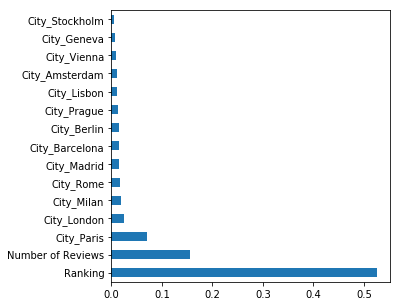

In [472]:
# Проверяем полученную модель
ML(data[data['sample'] == 1])

Получем  МАЕ = 0.215

#### Возьмем следующий признак "Price Range".

In [473]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [474]:
data['Price Range'].describe() # Смотрим описание колонки

count        32639
unique           3
top       $$ - $$$
freq         23041
Name: Price Range, dtype: object

In [475]:
data['Price Range'].fillna('?', inplace = True) # Для удобства заменим отстутствующие значения на '?'

In [476]:
data['Price Range'].value_counts() #  Проверяем

$$ - $$$    23041
?           17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [477]:
# Создадим две колонки 
# первая - количественное отображение цены
# вторая - отсутствие/наличие цены

In [478]:
pr = {'?':'0',
      '$':'1',
      '$$ - $$$':'2',
      '$$$$':'4'} # Оцениваем значения

In [479]:
data['Price'] = data['Price Range'].replace(pr) # проводим замену значений

In [480]:
# Проверяем
data.Price.value_counts()

2    23041
0    17361
1     7816
4     1782
Name: Price, dtype: int64

In [481]:
data.Price = data.Price.astype(int) # заменяем тип данных 

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE: 0.21305549999999998


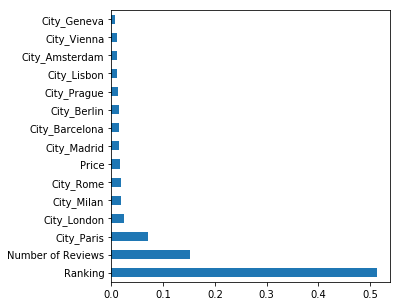

In [483]:
ML(data[data['sample'] == 1])

Предыдущий результат 0,215, нынешний 0,213

### Добавление столбцов с ценовыми категориями

In [484]:
data['Low'] = data['Price'].apply(lambda x: 1 if x==1 else 0)

In [485]:
data['Middle'] = data['Price'].apply(lambda x: 1 if x==2 else 0)

In [486]:
data['High'] = data['Price'].apply(lambda x: 1 if x==4 else 0)

In [487]:
data['Unknown'] = data['Price'].apply(lambda x: 0 if x==0 else 1)

In [488]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price,Low,Middle,High,Unknown
7948,id_7948,"['Italian', 'Chinese']",5702.0,?,7.0,"[['Dinner'], ['01/25/2017']]",/Restaurant_Review-g187849-d3913896-Reviews-Ri...,d3913896,0,0.0,...,0,0,0,0,0,0,0,0,0,0
30933,id_2340,"['Bar', 'Mediterranean', 'Spanish']",2341.0,$$ - $$$,216.0,"[['Good food, great service.', 'Average food, ...",/Restaurant_Review-g187497-d3806131-Reviews-El...,d3806131,1,3.5,...,0,0,0,0,0,2,0,1,0,1
25261,id_3231,NaN,3233.0,?,0.0,"[[], []]",/Restaurant_Review-g187323-d11624752-Reviews-K...,d11624752,1,5.0,...,0,0,0,0,0,0,0,0,0,0
43766,id_985,NaN,994.0,?,7.0,"[['BEST vegan doner', 'A hidden gem'], ['04/17...",/Restaurant_Review-g187309-d10748187-Reviews-M...,d10748187,1,5.0,...,0,0,0,0,0,0,0,0,0,0
1627,id_1627,"['Italian', 'Pizza']",3324.0,$,12.0,"[['Pizza cut', 'Even terrible is too much said...",/Restaurant_Review-g190454-d3557532-Reviews-Pi...,d3557532,0,0.0,...,0,1,0,0,0,1,1,0,0,1


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE: 0.21351499999999995


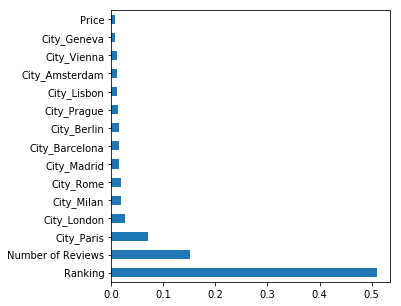

In [491]:
# Проверяем результат обработки
ML(data[data['sample'] == 1])

In [492]:
# Результат не улучшили. Проверим модель на всех ранее внесенных данныхь

In [493]:
#drop(['Rating'], axis = 1)

In [494]:
test_1 = data.drop(['Restaurant_id', 'Cuisine Style','Price Range',  'Reviews','URL_TA','ID_TA'], axis =1)

In [495]:
test_1

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price,Low,Middle,High,Unknown
0,12963.0,4.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
1,106.0,97.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
2,810.0,28.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
3,1669.0,202.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,1,1
4,37.0,162.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,4,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,500.0,79.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
49996,6341.0,542.0,1,3.5,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
49997,1652.0,4.0,1,4.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49998,641.0,70.0,1,4.0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,1


In [496]:
# Результат не улучшили (((

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE: 0.21351499999999995


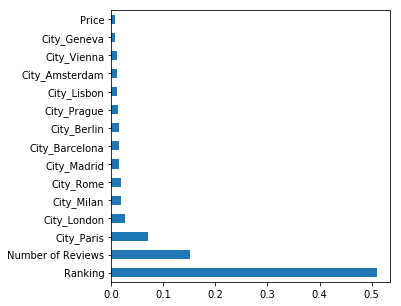

In [497]:
ML(test_1[test_1['sample'] == 1])

In [498]:
# Проводил тест по 

In [499]:
data.Reviews.value_counts()

[[], []]                                                                                                            8112
[['Good service and clean', 'Chinese fusion cuisine - ok to try if you...'], ['11/21/2017', '05/23/2017']]             2
[['Excellent food food', 'Fantastic sushi served tapas style'], ['09/07/2016', '02/21/2016']]                          2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]           2
[['Happened to drop in', 'Right for a quick bite'], ['11/30/2016', '06/20/2015']]                                      2
                                                                                                                    ... 
[['Great Indian food', 'Really great Indian food with a difference'], ['01/07/2018', '12/31/2017']]                    1
[['Nice food, atmosphere and staff', 'The best indian restaurant in Oslo!'], ['01/08/2018', '12/30/2017']]             1
[['Nice food with live Fado musi

In [500]:
 data['Reviews'] = data['Reviews'].map(lambda x: str(x).lstrip('[').rstrip(']')).astype(str) # Удаляем лишние знаки 

In [501]:
 data['Reviews'][1] # Проверяем

"'Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017'"

In [502]:
df_2 = data['Reviews'].str.split('],', expand = True) # Разделяем столб на два: отзыв и дата отзыва

In [503]:
df_2[1] = df_2[1].str.replace('[', '') # убираем лишние знаки

In [504]:
df_2[1] = df_2[1].str.replace('\'', '') # убираем лишние знаки

In [505]:
df_2[1] # проверяем результат

0                               
1         12/05/2017, 10/29/2017
2         12/28/2017, 12/06/2017
3         12/06/2017, 11/22/2017
4         02/08/2018, 01/24/2018
                  ...           
49995     12/16/2017, 11/12/2017
49996     12/21/2017, 12/12/2017
49997     11/03/2016, 04/12/2008
49998     07/11/2017, 06/18/2017
49999     01/31/2016, 07/04/2012
Name: 1, Length: 50000, dtype: object

In [506]:
df_2[0]

0                                                         
1         'Very good reviews!', 'Fine dining in Hakaniemi'
2                     'Better than the Links', 'Ivy Black'
3              'Most exquisite', 'Delicious and authentic'
4        'Always the best in bratislava', 'Very good bu...
                               ...                        
49995    'The real Italian experience!', 'Wonderful foo...
49996    'Parisian atmosphere', 'Bit pricey but interes...
49997    'Good by swedish standards', 'A hidden jewel i...
49998    'Underground restaurant', 'Oldest Restaurant i...
49999                        'Average', 'Nice an informal'
Name: 0, Length: 50000, dtype: object

In [507]:
df_3 = df_2[1].str.split(', ', expand = True) # разделяем на столбцы даты последнего и первого отзыва

In [508]:
df_3 # проверяем 0 - дата последнего отзыва 1 - первого

,0,1
0,,None
1,12/05/2017,10/29/2017
2,12/28/2017,12/06/2017
3,12/06/2017,11/22/2017
4,02/08/2018,01/24/2018
...,...,...
49995,12/16/2017,11/12/2017
49996,12/21/2017,12/12/2017
49997,11/03/2016,04/12/2008
49998,07/11/2017,06/18/2017


In [509]:
df_3[0].value_counts()

               8112
 01/07/2018     607
 01/03/2018     534
 01/06/2018     498
 01/04/2018     461
               ... 
 01/23/2015       1
 07/02/2014       1
 12/07/2012       1
 03/07/2013       1
 03/05/2010       1
Name: 0, Length: 1978, dtype: int64

In [510]:
df_3[df_3[0]==' ']

,0,1
0,,None
6,,None
7,,None
18,,None
20,,None
...,...,...
49981,,None
49986,,None
49988,,None
49991,,None


In [511]:
df_3[0]= pd.to_datetime(df_3[0], errors='coerce') # переводим столб из формата строки в даты
df_3[1]= pd.to_datetime(df_3[1], errors='coerce') # переводим столб из формата строки в даты

In [512]:
df_3

,0,1
0,NaT,NaT
1,2017-12-05,2017-10-29
2,2017-12-28,2017-12-06
3,2017-12-06,2017-11-22
4,2018-02-08,2018-01-24
...,...,...
49995,2017-12-16,2017-11-12
49996,2017-12-21,2017-12-12
49997,2016-11-03,2008-04-12
49998,2017-07-11,2017-06-18


In [513]:
df_3[3] = (df_3[0]-df_3[1])

In [514]:
df_3[3].describe()

count                       36205
mean     124 days 17:25:00.555171
std      233 days 00:14:01.051234
min           -362 days +00:00:00
25%              13 days 00:00:00
50%              55 days 00:00:00
75%             157 days 00:00:00
max            3296 days 00:00:00
Name: 3, dtype: object

In [515]:
df_3[3] = df_3[3].astype('timedelta64[D]') # переводим формат даты в числовой

In [516]:
df_3[3].describe()

count    36205.000000
mean       124.725701
std        233.009734
min       -362.000000
25%         13.000000
50%         55.000000
75%        157.000000
max       3296.000000
Name: 3, dtype: float64

In [517]:
df_3[3] = abs(df_3[3]) # Определяем модуль разницы дат

In [518]:
df_3[3]

0           NaN
1          37.0
2          22.0
3          14.0
4          15.0
          ...  
49995      34.0
49996       9.0
49997    3127.0
49998      23.0
49999    1306.0
Name: 3, Length: 50000, dtype: float64

In [519]:
df_3[3] = df_3[3].fillna(0) # Заменяем отсутствующие значения на 0 

In [520]:
data['Rev_date'] = df_3[3]

In [521]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 49 columns):
Restaurant_id              50000 non-null object
Cuisine Style              38410 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null object
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
City_Amsterdam             50000 non-null uint8
City_Athens                50000 non-null uint8
City_Barcelona             50000 non-null uint8
City_Berlin                50000 non-null uint8
City_Bratislava            50000 non-null uint8
City_Brussels              50000 non-null uint8
City_Budapest              50000 non-null uint8
City_Copenhagen

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE: 0.213614


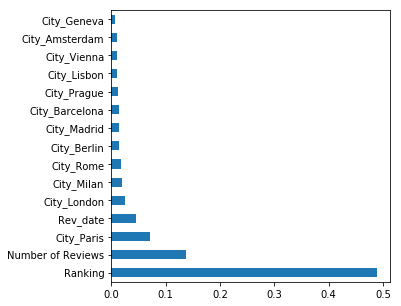

In [523]:
ML(data[data['sample'] == 1])

Добавление dummy переменных для видов кухни

## Добавление dummy переменных для видов кухни

In [524]:
data['Cuisine Style'].value_counts()

['Italian']                                                                                                                           1332
['French']                                                                                                                            1019
['Spanish']                                                                                                                            860
['French', 'European']                                                                                                                 503
['Cafe']                                                                                                                               500
                                                                                                                                      ... 
['Spanish', 'Bar', 'European', 'Pub', 'Vegetarian Friendly']                                                                             1
['Lebanese', 'Mediterranean

In [525]:
cuisine = data['Cuisine Style']

In [526]:
cuisine

0                                           ['Bar', 'Pub']
1        ['European', 'Scandinavian', 'Gluten Free Opti...
2                                  ['Vegetarian Friendly']
3        ['Italian', 'Mediterranean', 'European', 'Vege...
4        ['Italian', 'Mediterranean', 'European', 'Seaf...
                               ...                        
49995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
49996    ['French', 'American', 'Bar', 'European', 'Veg...
49997                                ['Japanese', 'Sushi']
49998    ['Polish', 'European', 'Eastern European', 'Ce...
49999                                          ['Spanish']
Name: Cuisine Style, Length: 50000, dtype: object

In [527]:
cuisine = cuisine.map(lambda x: str(x).lstrip('[').rstrip(']')).astype(str)

In [528]:
cuisine

0                                             'Bar', 'Pub'
1        'European', 'Scandinavian', 'Gluten Free Optio...
2                                    'Vegetarian Friendly'
3        'Italian', 'Mediterranean', 'European', 'Veget...
4        'Italian', 'Mediterranean', 'European', 'Seafo...
                               ...                        
49995    'Italian', 'Vegetarian Friendly', 'Vegan Optio...
49996    'French', 'American', 'Bar', 'European', 'Vege...
49997                                  'Japanese', 'Sushi'
49998    'Polish', 'European', 'Eastern European', 'Cen...
49999                                            'Spanish'
Name: Cuisine Style, Length: 50000, dtype: object

In [529]:
cuisine = cuisine.map(lambda x: str(x).lstrip('"').rstrip('"')).astype(str)

In [530]:
cuisine

0                                             'Bar', 'Pub'
1        'European', 'Scandinavian', 'Gluten Free Optio...
2                                    'Vegetarian Friendly'
3        'Italian', 'Mediterranean', 'European', 'Veget...
4        'Italian', 'Mediterranean', 'European', 'Seafo...
                               ...                        
49995    'Italian', 'Vegetarian Friendly', 'Vegan Optio...
49996    'French', 'American', 'Bar', 'European', 'Vege...
49997                                  'Japanese', 'Sushi'
49998    'Polish', 'European', 'Eastern European', 'Cen...
49999                                            'Spanish'
Name: Cuisine Style, Length: 50000, dtype: object

In [531]:
cuisine = cuisine.str.replace('\'','') # удаляем все кавычки в строках

In [532]:
cuisine

0                                                 Bar, Pub
1        European, Scandinavian, Gluten Free Options, V...
2                                      Vegetarian Friendly
3        Italian, Mediterranean, European, Vegetarian F...
4        Italian, Mediterranean, European, Seafood, Veg...
                               ...                        
49995    Italian, Vegetarian Friendly, Vegan Options, G...
49996    French, American, Bar, European, Vegetarian Fr...
49997                                      Japanese, Sushi
49998    Polish, European, Eastern European, Central Eu...
49999                                              Spanish
Name: Cuisine Style, Length: 50000, dtype: object

In [533]:
cuisine = cuisine.str.replace(' ','') # удаляем все пробелы в датасете

In [534]:
cuisine # проверяем

0                                                  Bar,Pub
1        European,Scandinavian,GlutenFreeOptions,Vegeta...
2                                       VegetarianFriendly
3        Italian,Mediterranean,European,VegetarianFrien...
4        Italian,Mediterranean,European,Seafood,Vegetar...
                               ...                        
49995    Italian,VegetarianFriendly,VeganOptions,Gluten...
49996      French,American,Bar,European,VegetarianFriendly
49997                                       Japanese,Sushi
49998    Polish,European,EasternEuropean,CentralEuropea...
49999                                              Spanish
Name: Cuisine Style, Length: 50000, dtype: object

In [535]:
cuisine.value_counts()

nan                                                        11590
Italian                                                     1332
French                                                      1019
Spanish                                                      860
French,European                                              503
                                                           ...  
Chinese,Japanese,Seafood,Sushi,Soups,VegetarianFriendly        1
Asian,Thai,Soups,Fusion,VegetarianFriendly,VeganOptions        1
Lebanese,Mediterranean,European,Soups,Swedish                  1
BrewPub,Bar,Cafe,FastFood,Spanish,Pub                          1
Korean,VegetarianFriendly                                      1
Name: Cuisine Style, Length: 10732, dtype: int64

In [536]:
cuisine1 = cuisine.str.split(',', expand = True).stack() # Создаем датасет для определения всех типов кухонь

In [537]:
cuisine_list = cuisine1.unique() # Создаем список для  всех типов кухонь

In [538]:
cuisine_list

array(['Bar', 'Pub', 'European', 'Scandinavian', 'GlutenFreeOptions',
       'VegetarianFriendly', 'VeganOptions', 'Italian', 'Mediterranean',
       'Seafood', 'French', 'Cafe', 'FastFood', 'Portuguese', 'nan',
       'Greek', 'Czech', 'EasternEuropean', 'CentralEuropean', 'Pizza',
       'British', 'Spanish', 'Norwegian', 'African', 'Moroccan',
       'MiddleEastern', 'Halal', 'Indian', 'Thai', 'Dutch', 'Welsh',
       'American', 'Steakhouse', 'Soups', 'Scottish', 'Fusion',
       'StreetFood', 'Hungarian', 'Asian', 'WineBar', 'Barbecue',
       'CentralAmerican', 'Peruvian', 'SouthAmerican', 'Irish', 'Polish',
       'Vietnamese', 'Lebanese', 'Turkish', 'Healthy', 'Japanese',
       'Sushi', 'Austrian', 'Chinese', 'Danish', 'International',
       'Gastropub', 'Korean', 'German', 'Contemporary', 'Arabic', 'Diner',
       'Swiss', 'Swedish', 'Persian', 'Australian', 'Grill', 'Mexican',
       'Latin', 'Belgian', 'Argentinean', 'Tunisian', 'Russian', 'Nepali',
       'Bangladeshi', '

In [539]:
cuisine2 = cuisine.str.split(',') # создаем датасет для создания дамми переменных 

In [540]:
cuisine2 # проверяем

0                                               [Bar, Pub]
1        [European, Scandinavian, GlutenFreeOptions, Ve...
2                                     [VegetarianFriendly]
3        [Italian, Mediterranean, European, VegetarianF...
4        [Italian, Mediterranean, European, Seafood, Ve...
                               ...                        
49995    [Italian, VegetarianFriendly, VeganOptions, Gl...
49996    [French, American, Bar, European, VegetarianFr...
49997                                    [Japanese, Sushi]
49998    [Polish, European, EasternEuropean, CentralEur...
49999                                            [Spanish]
Name: Cuisine Style, Length: 50000, dtype: object

In [541]:
for i in cuisine_list:
    data[i] = cuisine2.apply(lambda x: 1 if i in x else 0) # создаем dummy переменные  в основном датасете

In [542]:
data.European.value_counts() # проверяем

0    37439
1    12561
Name: European, dtype: int64

In [543]:
data.VegetarianFriendly.value_counts()# проверяем

0    35979
1    14021
Name: VegetarianFriendly, dtype: int64

In [544]:
data.Bar.value_counts()# проверяем

0    45906
1     4094
Name: Bar, dtype: int64

### Добавляем столбец наличия или отсутствия отзыва на сайте tripadvisor

In [545]:
df_2[0].value_counts()

                                                                                         8112
'Excellent'                                                                                28
'Very good'                                                                                15
'Good food'                                                                                14
'Delicious'                                                                                11
                                                                                         ... 
'Authentic brilliance', 'Traditional German restaurant'                                     1
'expensive, pretentious, and small.', 'interesting decor, but food not very excit...'       1
'Will go back.', 'Very very very nice, unknown for me but re...'                            1
'Traditional Greek cuisine with a twist', 'Highly Recommended Greek Cuisine'                1
'Great environment and food', 'Lovely burger!'              

видим, что у нас есть 8112 пустующих значения

In [546]:
df_2[df_2[0] == ''] # Определяем, как выглядят строки без отзыва

,0,1,2
0,,,None
6,,,None
7,,,None
18,,,None
20,,,None
...,...,...,...
49981,,,None
49986,,,None
49988,,,None
49991,,,None


In [547]:
df_2.fillna('')

,0,1,2
0,,,
1,"'Very good reviews!', 'Fine dining in Hakaniemi'","12/05/2017, 10/29/2017",
2,"'Better than the Links', 'Ivy Black'","12/28/2017, 12/06/2017",
3,"'Most exquisite', 'Delicious and authentic'","12/06/2017, 11/22/2017",
4,"'Always the best in bratislava', 'Very good bu...","02/08/2018, 01/24/2018",
...,...,...,...
49995,"'The real Italian experience!', 'Wonderful foo...","12/16/2017, 11/12/2017",
49996,"'Parisian atmosphere', 'Bit pricey but interes...","12/21/2017, 12/12/2017",
49997,"'Good by swedish standards', 'A hidden jewel i...","11/03/2016, 04/12/2008",
49998,"'Underground restaurant', 'Oldest Restaurant i...","07/11/2017, 06/18/2017",


In [548]:
data['Rev'] = df_2[0].apply(lambda x: 0 if x=='' else 1).astype(int) # Создаем dummy переменные для наличия/отсутствия отзыва

In [549]:
data['Rev'].value_counts() # Проверяем

1    41888
0     8112
Name: Rev, dtype: int64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE: 0.21374249999999997


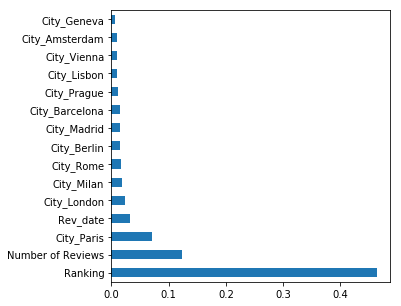

In [550]:
# Проверяем результат
ML(data[data['sample'] == 1].drop(['Restaurant_id', 'Cuisine Style','Price Range',  'Reviews','URL_TA','ID_TA'], axis =1))

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [ ]:
# тут ваш код на обработку других признаков
# .....

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

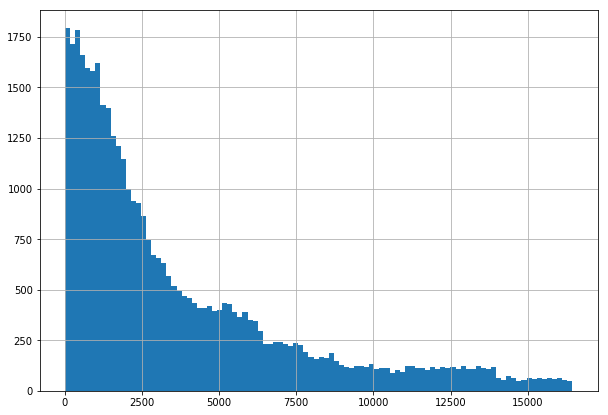

In [392]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

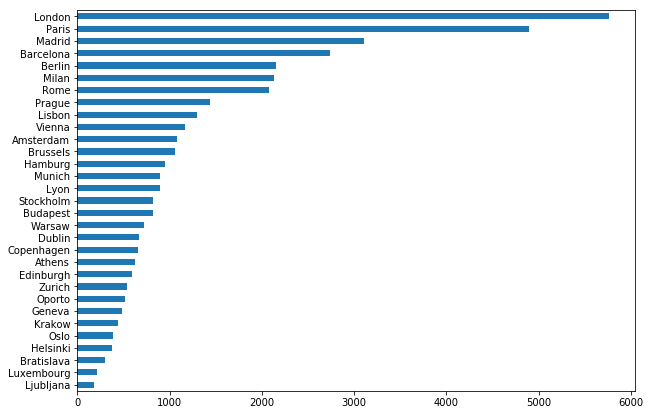

In [393]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

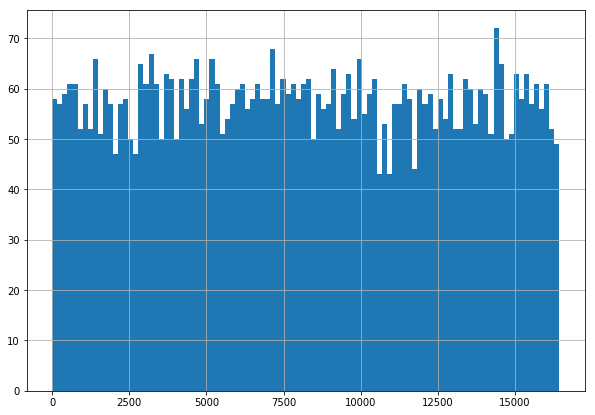

In [394]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

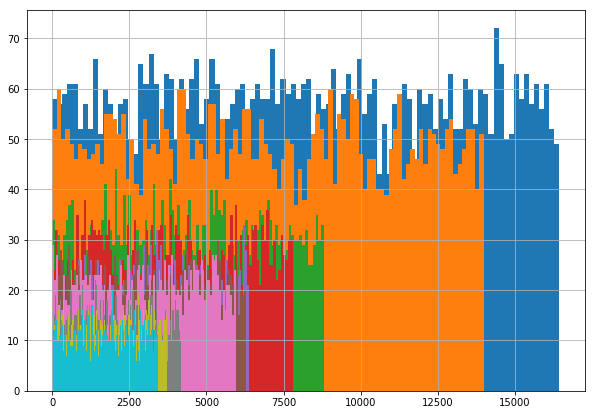

In [395]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

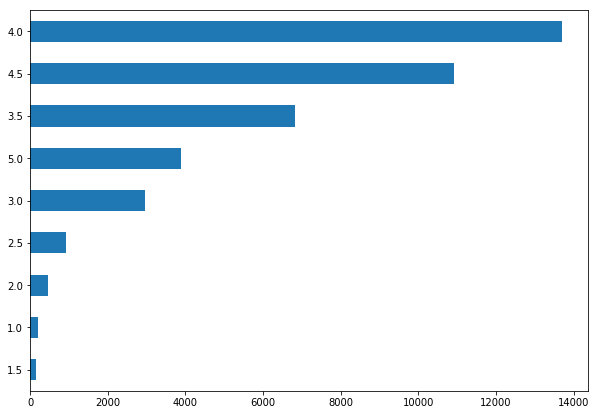

In [396]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

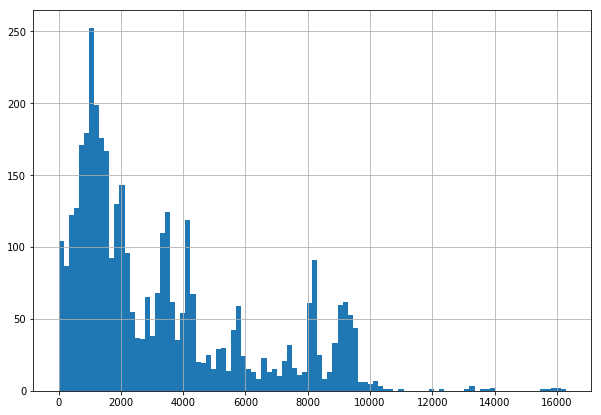

In [397]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

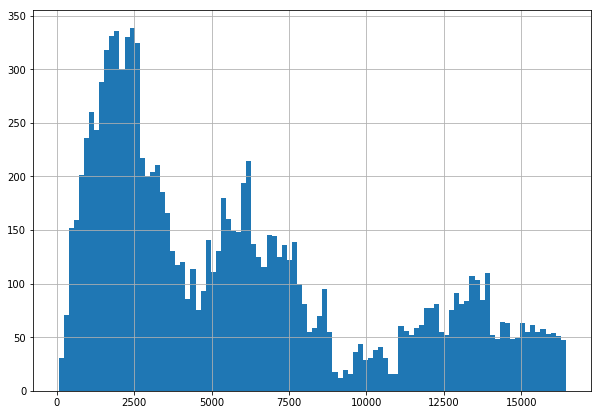

In [398]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

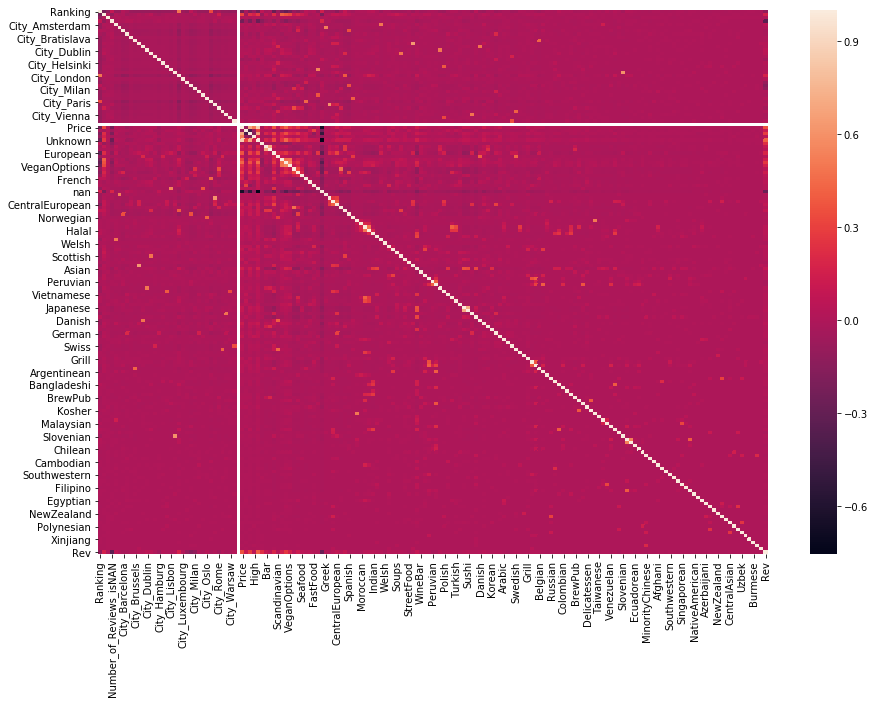

In [399]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [400]:
# на всякий случай, заново подгружаем данные
# df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
# df_train['sample'] = 1 # помечаем где у нас трейн
# df_test['sample'] = 0 # помечаем где у нас тест
# df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

# data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [551]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    #data['Price Range'].fillna('?', inplace = True) # Для удобства заменим отстутствующие значения на '?'
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [552]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,CentralAsian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,Rev
42614,8773.0,21.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44548,1581.0,103.0,1,3.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42100,4073.0,33.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48024,2525.0,231.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48261,5424.0,30.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45832,322.0,523.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49888,5909.0,60.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29080,3846.0,8.0,1,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
23919,2543.0,5.0,1,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29370,440.0,1108.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [553]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 170 entries, Ranking to Rev
dtypes: float64(4), int64(133), uint8(33)
memory usage: 53.8 MB


In [554]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [555]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [556]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 169), (40000, 169), (40000, 168), (32000, 168), (8000, 168))

# Model 
Сам ML

In [557]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [558]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [559]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [560]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21147625


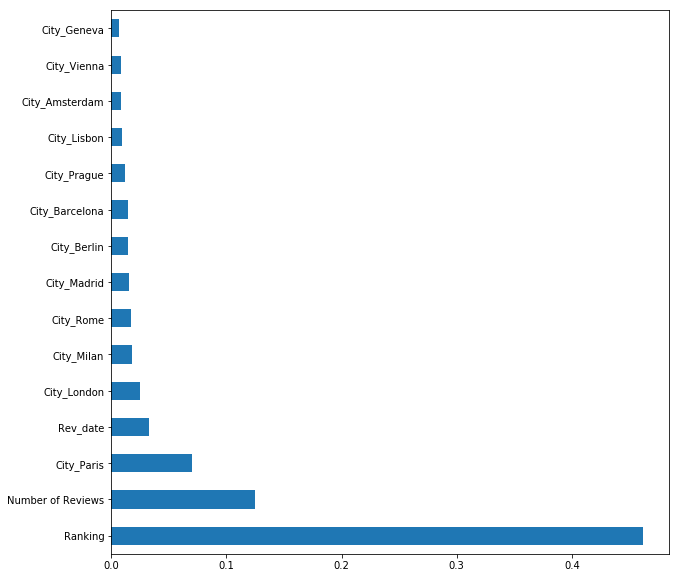

In [561]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [562]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,...,CentralAsian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,Rev
1867,1308.0,4.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1347,2432.0,247.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1692,203.0,134.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6215,1018.0,570.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4364,1888.0,5.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7862,537.0,249.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3400,1593.0,139.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
265,11545.0,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1066,1780.0,36.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8587,4039.0,17.0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [563]:
test_data = test_data.drop(['Rating'], axis=1)

In [564]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [565]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [566]:
predict_submission

array([3.03 , 4.27 , 4.42 , ..., 3.01 , 4.495, 4.26 ])

In [567]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.030
1,id_1,4.270
2,id_2,4.420
3,id_3,4.380
4,id_4,4.450
5,id_5,4.460
6,id_6,2.395
7,id_7,2.705
8,id_8,4.240
9,id_9,4.650


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!


In [ ]:
# 